sweep data (ADC): [-26.8555 -31.1279 -20.1416 ... -28.6865 -27.4658 -34.79  ]
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
sweep times (seconds): [0.     0.     0.     ... 0.6999 0.7    0.7   ]


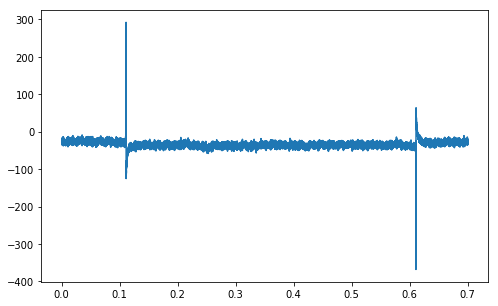

Membrame Resistance: [1107.3569 1380.7045  928.3035 ... 1021.9688  801.6283 1091.3499]
Membrame Resistance:MOhm 1094.5479473544535
------------
Membrame Capacitance: [13.7155 13.6976 12.4944 ... 12.4693 14.0213 13.339 ]
Membrame Capacitance:pF 14.576298120026502
------------
Ra: [123.924  122.7213 133.5937 ... 134.321  135.5592 129.3953]
Ra:MOhm 131.39920329724262


In [7]:
#single cell, calculate the membrane resistance and capacitance
import numpy as np
import pyabf
import pyabf.tools.memtest
import matplotlib.pyplot as plt


abf = pyabf.ABF("21510001.abf")
memtest = pyabf.tools.memtest.Memtest(abf)
abf.setSweep(3)
print("sweep data (ADC):", abf.sweepY)
print("sweep command (DAC):", abf.sweepC)
print("sweep times (seconds):", abf.sweepX)
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepX, abf.sweepY)
plt.show()
print('Membrame Resistance:',memtest.Rm.values)
print('Membrame Resistance:MOhm',np.mean(memtest.Rm.values))

print('------------')
print('Membrame Capacitance:',memtest.CmStep.values)
print('Membrame Capacitance:pF',np.mean(memtest.CmStep.values))

print('------------')
print('Ra:',memtest.Ra.values)
print('Ra:MOhm',np.mean(memtest.Ra.values))

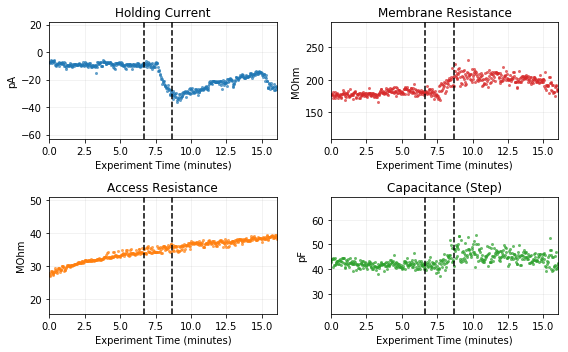

In [2]:
import pyabf
import pyabf.tools.memtest
import matplotlib.pyplot as plt

abf = pyabf.ABF("vc_drug_memtest.abf")
memtest = pyabf.tools.memtest.Memtest(abf)

# That's it! The rest of the code just plots these 4 numpy arrays.
fig = plt.figure(figsize=(8, 5))

ax1 = fig.add_subplot(221)
ax1.grid(alpha=.2)
ax1.plot(abf.sweepTimesMin, memtest.Ih.values,
         ".", color='C0', alpha=.7, mew=0)
ax1.set_title(memtest.Ih.name)
ax1.set_ylabel(memtest.Ih.units)

ax2 = fig.add_subplot(222)
ax2.grid(alpha=.2)
ax2.plot(abf.sweepTimesMin, memtest.Rm.values,
         ".", color='C3', alpha=.7, mew=0)
ax2.set_title(memtest.Rm.name)
ax2.set_ylabel(memtest.Rm.units)

ax3 = fig.add_subplot(223)
ax3.grid(alpha=.2)
ax3.plot(abf.sweepTimesMin, memtest.Ra.values,
         ".", color='C1', alpha=.7, mew=0)
ax3.set_title(memtest.Ra.name)
ax3.set_ylabel(memtest.Ra.units)

ax4 = fig.add_subplot(224)
ax4.grid(alpha=.2)
ax4.plot(abf.sweepTimesMin, memtest.CmStep.values,
         ".", color='C2', alpha=.7, mew=0)
ax4.set_title(memtest.CmStep.name)
ax4.set_ylabel(memtest.CmStep.units)

for ax in [ax1, ax2, ax3, ax4]:
    ax.margins(0, .9)
    ax.set_xlabel("Experiment Time (minutes)")
    for tagTime in abf.tagTimesMin:
        ax.axvline(tagTime, color='k', ls='--')

plt.tight_layout()
plt.show()

In [3]:
#-10 mV step, similar to clamfit calculation.
print(memtest.Rm.values)
print("first sweep:",-10/-54.6448*1000)
print("second sweep:",-10/-54.1814*1000)
print("-1 sweep:",-10/-52.3469*1000)
print("-2 sweep:",-10/-51.4279*1000)

[177.8927 176.9462 178.3166 ... 185.4741 184.8138 184.7151]
first sweep: 183.0000292800047
second sweep: 184.56518288563973
-1 sweep: 191.03327990769273
-2 sweep: 194.44698305783436


In [27]:
## Sometimes it is useful to see all the data contained in the ABF header. 
## While inspecting the header is not necessary to use pyabf, 
## it is useful to know how to access this information.
# print(abf.headerText) # display header information in the console
abf.headerLaunch() # display header information in a web browser

INFO:pyabf.abf:creating a temporary webpage C:\Users\zhouli\AppData\Local\Temp\tmpc0ynwr2p.html ...
INFO:pyabf.abf:launching file in a web browser ...
INFO:pyabf.abf:waiting a few seconds for the browser to launch...
INFO:pyabf.abf:deleted C:\Users\zhouli\AppData\Local\Temp\tmpc0ynwr2p.html


sweep data (ADC): [ -8.5449  -9.7656  -9.7656 ...  -7.9346 -15.8691  -1.8311]
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
sweep times (seconds): [0.     0.     0.     ... 0.6999 0.7    0.7   ]


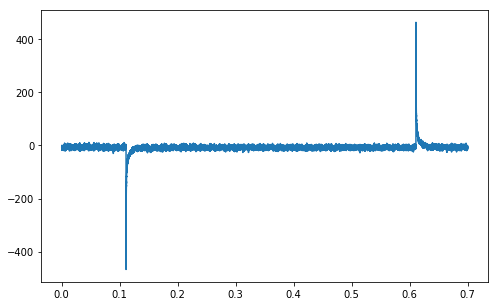

In [4]:
abf = pyabf.ABF("21225001.abf")
memtest = pyabf.tools.memtest.Memtest(abf)
abf.setSweep(0)
print("sweep data (ADC):", abf.sweepY)
print("sweep command (DAC):", abf.sweepC)
print("sweep times (seconds):", abf.sweepX)
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepX, abf.sweepY)
plt.show()

In [34]:
memtest.Ih.values

array([-7.2632, -7.16  , -7.567 , ..., -8.5776, -7.9257, -8.7255])

In [38]:
#calculate in clampfit for first sweep as -7.30543, this is holding current, not the delta I
# looks like error rate is less than 1%
import numpy as np
np.abs(-7.30543-memtest.Ih.values[0])/np.abs(memtest.Ih.values[0])

0.005816513613445421

sweep data (ADC): [-29.9072 -22.583  -24.4141 ... -23.1934 -25.0244 -28.6865]
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
sweep times (seconds): [0.     0.     0.     ... 0.6999 0.7    0.7   ]


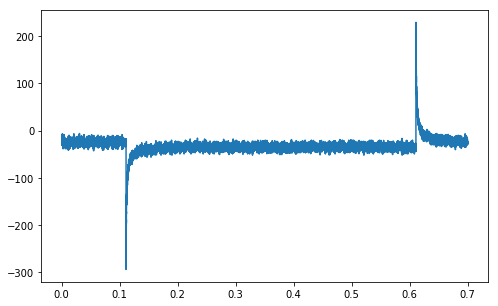

Membrame Resistance: [ 811.1692  851.5149 1000.4885 ... 1026.8366  912.0565  932.4561]
Membrame Resistance:MOhm 972.7048790177826
------------
Membrame Capacitance: [62.0724 64.2367 69.7249 ... 67.5018 65.29   64.1933]
Membrame Capacitance:pF 65.60956247081707
------------
Ra: [46.1754 44.8928 43.5914 ... 44.298  41.4926 44.9885]
Ra:MOhm 43.84007704860693


In [112]:
#single cell, calculate the membrane resistance and capacitance
import numpy as np
import pyabf
import pyabf.tools.memtest
import matplotlib.pyplot as plt


abf = pyabf.ABF("21304042.abf")
memtest = pyabf.tools.memtest.Memtest(abf)
abf.setSweep(3)
print("sweep data (ADC):", abf.sweepY)
print("sweep command (DAC):", abf.sweepC)
print("sweep times (seconds):", abf.sweepX)
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepX, abf.sweepY)
plt.show()
print('Membrame Resistance:',memtest.Rm.values)
print('Membrame Resistance:MOhm',np.mean(memtest.Rm.values))

print('------------')
print('Membrame Capacitance:',memtest.CmStep.values)
print('Membrame Capacitance:pF',np.mean(memtest.CmStep.values))

print('------------')
print('Ra:',memtest.Ra.values)
print('Ra:MOhm',np.mean(memtest.Ra.values))